In [1]:
using Plots
using LaTeXStrings
using ForwardDiff

In [2]:
f(x, y) =  x^2*y + (1/(x^2 + y^2 + 1))
f_x(x, y) = 2x*y - 2x/(x^2 + y^2 + 1)^2
f_y(x, y) = x^2 - 2y/(x^2 + y^2 + 1)^2

f_y (generic function with 1 method)

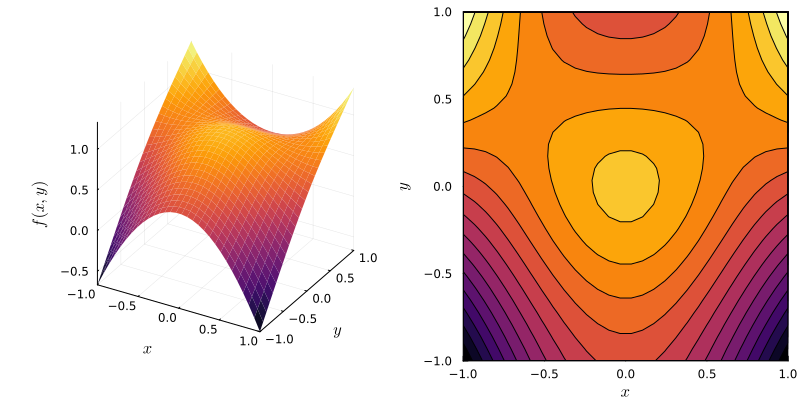

In [3]:
min_x = -1
max_x = 1

min_y = -1
max_y = 1

x = range(min_x, max_x, length=30)
y = range(min_y, max_y, length=30)

p1 = surface(x, y, f, cbar=false, alpha=0.98)
p2 = contour(x, y, f, fill=true, cbar=false)


plot(
    p1,
    p2,
    layout=(1,2), size=(800, 400), legend=false,
    xlims=(min_x, max_x), ylims=(min_y, max_y),
    camera=(30, 30), xlabel=L"x", ylabel=L"y", zlabel=L"f(x,y)",
)



# savefig("../img/f0.png")


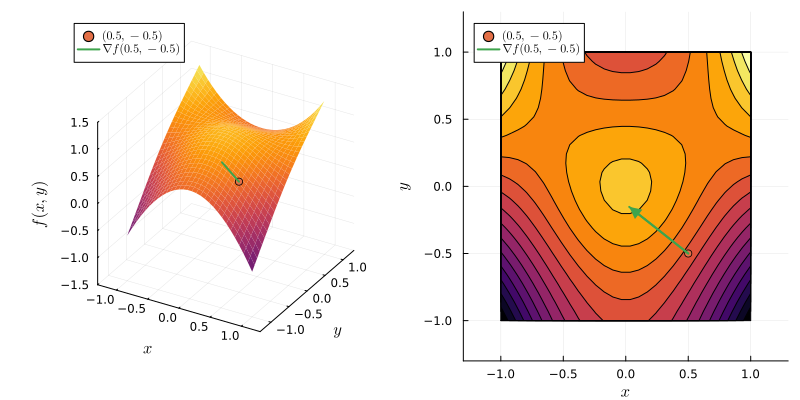

In [4]:
p1 = surface(x, y, f, cbar=false, alpha=0.98)

_x = 0.5
_y = -0.5
_z = f(_x, _y)

k = 0.5
g_x = f_x(_x, _y)
g_y = f_y(_x, _y)

scatter!(p1, [_x], [_y], [_z], label=L"(0.5, -0.5)")

arrow_x = [_x, _x + (k * g_x)]
arrow_y = [_y, _y + (k * g_y)]
arrow_z = [_z, _z]

plot!(p1, arrow_x, arrow_y, arrow_z, arrow=(:closed, 10.0), label=L"\nabla f(0.5, -0.5)", linewidth = 2)

p2 = contour(x, y, f, fill=true, cbar=false)

scatter!(p2, [_x], [_y], label=L"(0.5, -0.5)")

arrow_x = [_x, _x + (k * g_x)]
arrow_y = [_y, _y + (k * g_y)]

plot!(p2, arrow_x, arrow_y, arrow=(:closed, 10.0), label=L"\nabla f(0.5, -0.5)", linewidth = 2)


plot(
    p1,
    p2,
    layout=(1,2), size=(800, 400),
    xlims=(-1.3,1.3), ylims=(-1.3,1.3), zlims=(-1.5,1.5),
    camera=(30, 30), xlabel=L"x", ylabel=L"y", zlabel=L"f(x,y)",
)

# savefig("../img/f1.png")

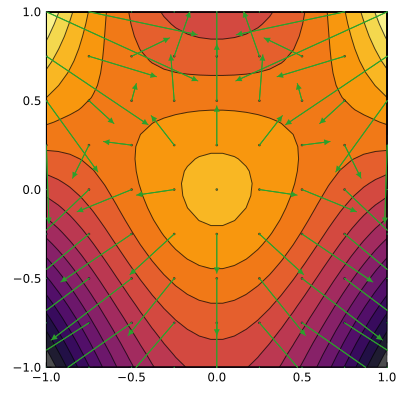

In [5]:
p = contour(x, y, f, fill=true, cbar=false, alpha=0.7)


color = get_color_palette(:tab10, 10)

N = 10
k = 0.5

for _x in -1.0:0.25:1.0, _y in -1.0:0.25:1.0

    _z = f(_x, _y)
    g_x = - f_x(_x, _y)
    g_y = - f_y(_x, _y)

    arrow_x = [_x, _x + (k * g_x)]
    arrow_y = [_y, _y + (k * g_y)]  
    scatter!(p, [_x], [_y], label=nothing, color=color[1], alpha=0.6, markersize=1)
    plot!(p, arrow_x, arrow_y, arrow=(:closed, 100.0), linewidth=1, label=nothing, color=color[3])
end


xlims!(-1, 1)
ylims!(-1, 1)


plot(p, legend=false, size=(400, 400))

# savefig("../img/gd2d.png")


┌ Info: Saved animation to /var/folders/k0/0f8kvxl562db4z1s1j8l0v4c0000gn/T/jl_9YPQ1uJ8rG.gif
└ @ Plots /Users/yuchi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/k0/0f8kvxl562db4z1s1j8l0v4c0000gn/T/jl_9YPQ1uJ8rG.gif")
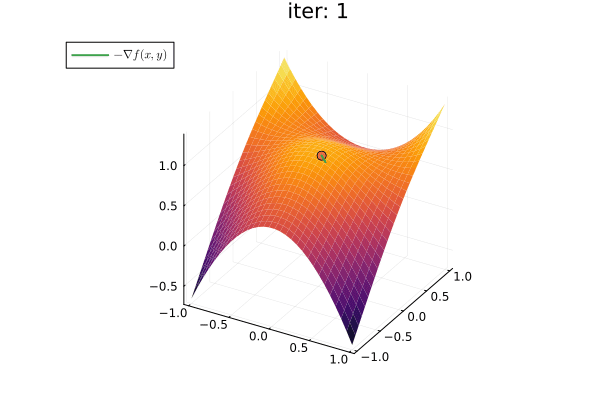

In [6]:
# 勾配降下法の gif
anim = Animation()

_x = 0.1
_y = -0.1
n_iter = 38
lr = 0.03

x_history = [_x]
y_history = [_y]
z_history = [f(_x, _y)]

for i in 1:n_iter
    _z = f(_x, _y)

    g_x = f_x(_x, _y)
    g_y = f_y(_x, _y)

    k = 0.5
    
    p1 = surface(x, y, f, cbar=false, alpha=0.98, title="iter: $i")
    
    scatter!(p1, [_x], [_y], [_z], label=nothing, markersize=5)

    

    arrow_x = [_x, _x - (k * g_x)]
    arrow_y = [_y, _y - (k * g_y)]
    arrow_z = [_z, _z]

    plot!(p1, arrow_x, arrow_y, arrow_z, arrow=(:closed, 10.0), label=L"-\nabla f(x, y)", linewidth = 2)

    plot!(p1, x_history, y_history, z_history, linewidth=2, label=nothing)

    frame(anim, p1)


    _x = _x - (lr * g_x)
    _y = _y - (lr * g_y)
    _z = f(_x, _y)

    push!(x_history, _x)
    push!(y_history, _y)
    push!(z_history, _z)
end


# gif(anim, "../img/gd3d.gif", fps = 10)
gif(anim, fps=10)

In [46]:
mutable struct SteepestDescent 
    lr::Float64
    n_iter::Int
    init_iter::Int
    SteepestDescent(;lr=0.03, n_iter=100) = new(lr, n_iter, n_iter)
end

function isfinish(algo::SteepestDescent)
    return algo.n_iter > 0
end

function update!(algo::SteepestDescent, x, g)
    algo.n_iter -= 1
    return x - (algo.lr * g)
end

function niter(algo::SteepestDescent)
    return (algo.init_iter - algo.n_iter)
end

niter (generic function with 2 methods)

In [38]:
function animate_gd(f, init_x, init_y, algo; x_range=(-1, 1), y_range=(-1, 1), camera=(30, 30))::Animation
    anim = Animation()

    _f(args) = f(args[1], args[2])
    g(x, y) = ForwardDiff.gradient(_f, [x, y])

    _x = init_x
    _y = init_y

    x_history = [_x]
    y_history = [_y]
    z_history = [f(_x, _y)]

    x = range(x_range[1], x_range[2], length=30)
    y = range(y_range[1], y_range[2], length=30)

    
    while isfinish(algo)
        _z = f(_x, _y)

        g_x, g_y = g(_x, _y)

        k = 0.5

        iter = niter(algo)

        p1 = surface(
            x,
            y,
            f,
            xlabel=L"x", ylabel=L"y", zlabel=L"f(x,y)",
            camera=camera,
            alpha=0.98,
            title="iter: $iter"
        )

        scatter!(p1, [_x], [_y], [_z], label=nothing, markersize=5)

        new_x = update!(algo, _x, g_x)
        new_y = update!(algo, _y, g_y)

        arrow_x = [_x, new_x]
        arrow_y = [_y, new_y]
        arrow_z = [_z, _z]

        plot!(p1, x_history, y_history, z_history, linewidth=2, label=nothing, color=:green)
        

        push!(x_history, new_x)
        push!(y_history, new_y)
        push!(z_history, f(new_x, new_y))
        
        _x = new_x
        _y = new_y

        plot!(p1, arrow_x, arrow_y, arrow_z, arrow=(:closed, 10.0), linewidth = 2, label=nothing)

        frame(anim, p1)

    end

    return anim
end

animate_gd (generic function with 1 method)

┌ Info: Saved animation to /var/folders/k0/0f8kvxl562db4z1s1j8l0v4c0000gn/T/jl_RuTKlMnKlM.gif
└ @ Plots /Users/yuchi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/k0/0f8kvxl562db4z1s1j8l0v4c0000gn/T/jl_RuTKlMnKlM.gif")
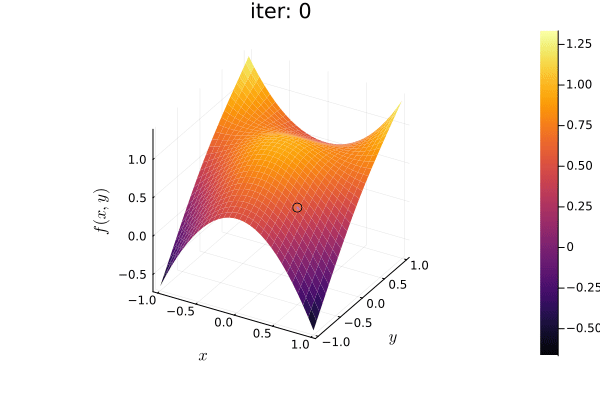

In [39]:
f(x, y) =  x^2*y + (1/(x^2 + y^2 + 1))

init_x = 0.5
init_y = -0.5


algo = SteepestDescent(lr= 0.03, n_iter=30)

anim = animate_gd(f, init_x, init_y, algo)

gif(anim, fps=10)

┌ Info: Saved animation to /Users/yuchi/Desktop/juiatokyo11/img/gd-3d-sphere.gif
└ @ Plots /Users/yuchi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/Users/yuchi/Desktop/juiatokyo11/img/gd-3d-sphere.gif")
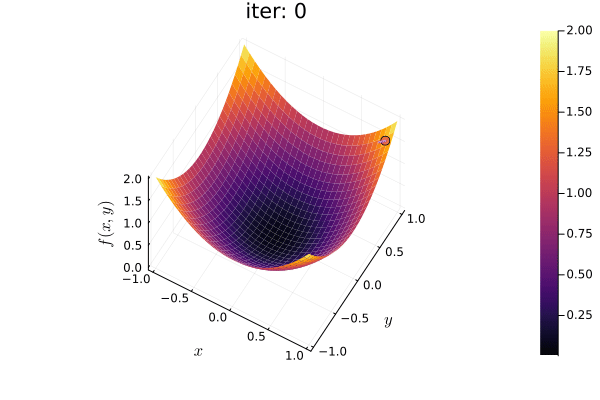

In [53]:
sphere(x, y) = x^2 + y^2

init_x = 0.9
init_y = 0.9

algo = SteepestDescent(lr= 0.03, n_iter=50)


anim = animate_gd(sphere, init_x, init_y, algo, x_range=(-1, 1), y_range=(-1, 1), camera=(30, 60))

gif(anim, fps=10)
# gif(anim, "../img/gd-3d-sphere.gif", fps=10)

┌ Info: Saved animation to /Users/yuchi/Desktop/juiatokyo11/img/gd-3d-pf.gif
└ @ Plots /Users/yuchi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/Users/yuchi/Desktop/juiatokyo11/img/gd-3d-pf.gif")
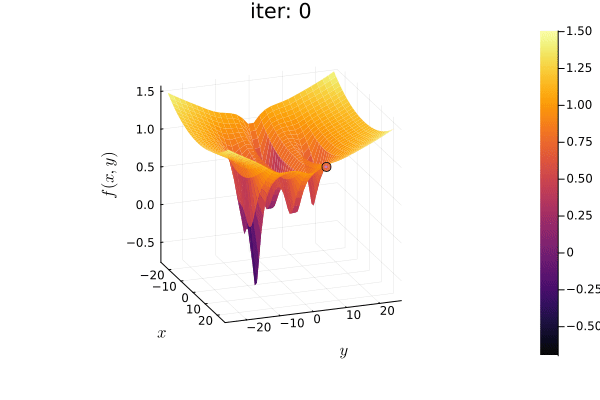

In [44]:
five_well_potential(x, y) = ((1 - (1 / (1 + 0.05 * (x ^ 2) + (y - 10) ^ 2))) - (1 / ((1 + 0.05 * (x - 10) ^ 2) + y ^ 2)) - (1.5 / ((1 + 0.03 * (x + 10) ^ 2) + y ^ 2)) - (2 / ((1 + 0.05 * (x - 5) ^ 2) + (y + 10) ^ 2)) - (1 / ((1 + 0.1 * (x + 5) ^ 2) + (y + 10) ^ 2))) * (1 + 0.0001 * (x ^ 2 + y ^ 2) ^ 1.2)

init_x = 10.
init_y = 10.

x_range = (-25, 25)
y_range = (-25, 25)
camera = (70, 20)

algo = SteepestDescent(lr= 12, n_iter=200)

anim = animate_gd(five_well_potential, init_x, init_y, algo, x_range=x_range, y_range=y_range, camera=camera)

# gif(anim, "../img/gd-3d-pf.gif", fps=10)
gif(anim, fps=10)